In [4]:
# import packages
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
# other installed packages: scipy, scikit-learn, statsmodel 

In [41]:
# read dataset
df = pd.read_csv('../datasets/1-ibm-hr.csv')
df = df.dropna()

In [49]:
# # split categorical and numerical columns

# categorical columns: Attrition, BusinessTravel, Department, EducationField, Gender, MaritalStatus, Over18, OverTime
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
categorical= df.select_dtypes(include= "object") 

# integer values with categorical meanings:
int_categorical_columns = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'JobLevel', 'StockOptionLevel']
int_categorical = df[int_categorical_columns]

# numerical columns
numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
numerical = df[numerical_columns]

In [50]:
# # one hot encoding
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()

# # OneHotEncoding of categorical predictors except Attrition)
# encoded_data = categorical[['BusinessTravel','Department', 'EducationField','JobRole', 'MaritalStatus']]
# ohe.fit(encoded_data)
# encoded_data_ohe = pd.DataFrame(ohe.transform(encoded_data).toarray(), columns=ohe.get_feature_names_out(encoded_data.columns))

# # Check the encoded variables
# encoded_data_ohe.info()


In [64]:
categorical_var_all = pd.concat([categorical,int_categorical],axis=1)

In [66]:
dummy_var = pd.get_dummies(categorical_var_all, drop_first=True)

In [66]:
dummy_var = pd.get_dummies(categorical_var_all, drop_first=True)

In [67]:
X = pd.concat([dummy_var,numerical], axis=1)
y = df["Attrition"]

In [68]:
X = sm.add_constant(X)

In [71]:
model = sm.Logit(np.asarray(y),np.asarray(X)).fit()

TypeError: '>=' not supported between instances of 'str' and 'int'

In [73]:
corr_matrix = X.corr()

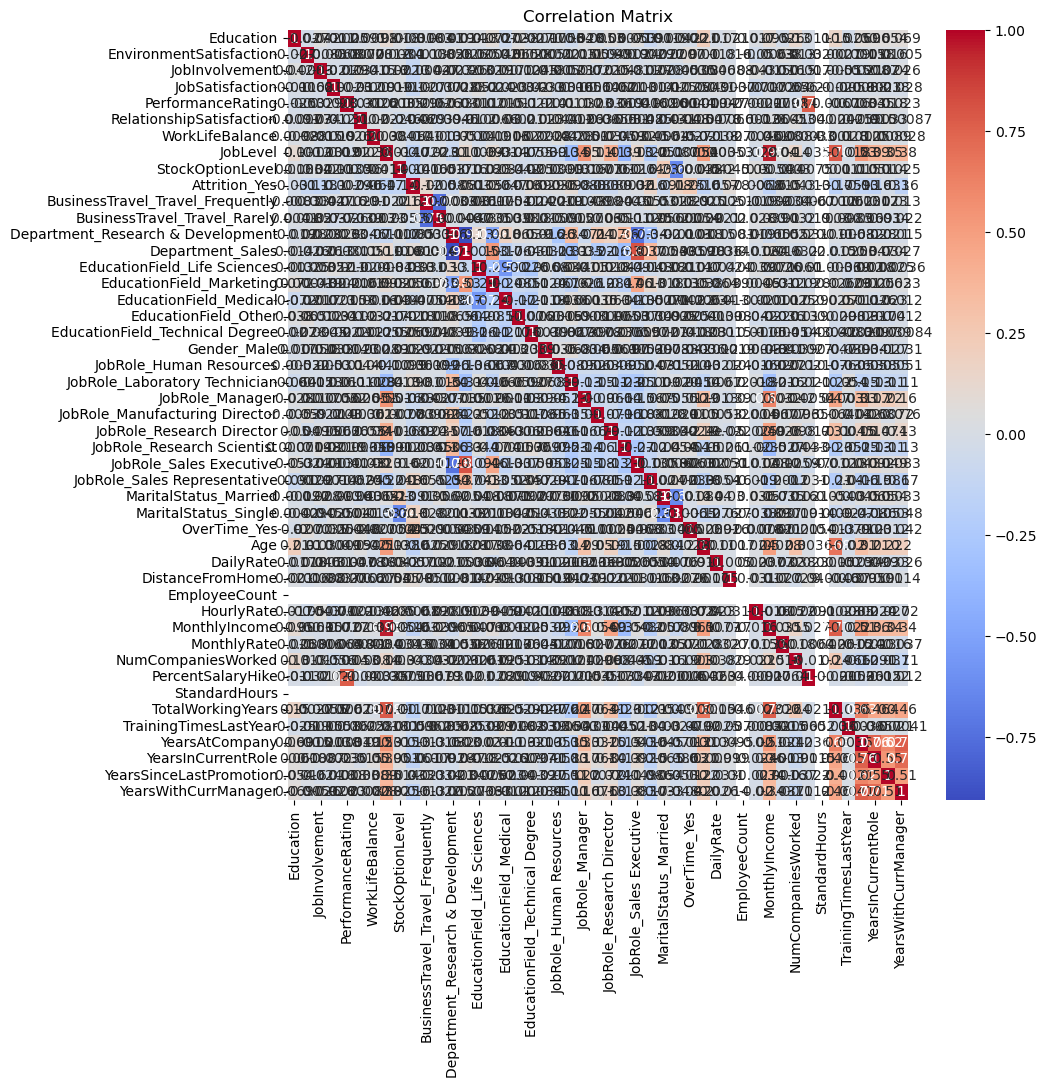

In [74]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot = True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

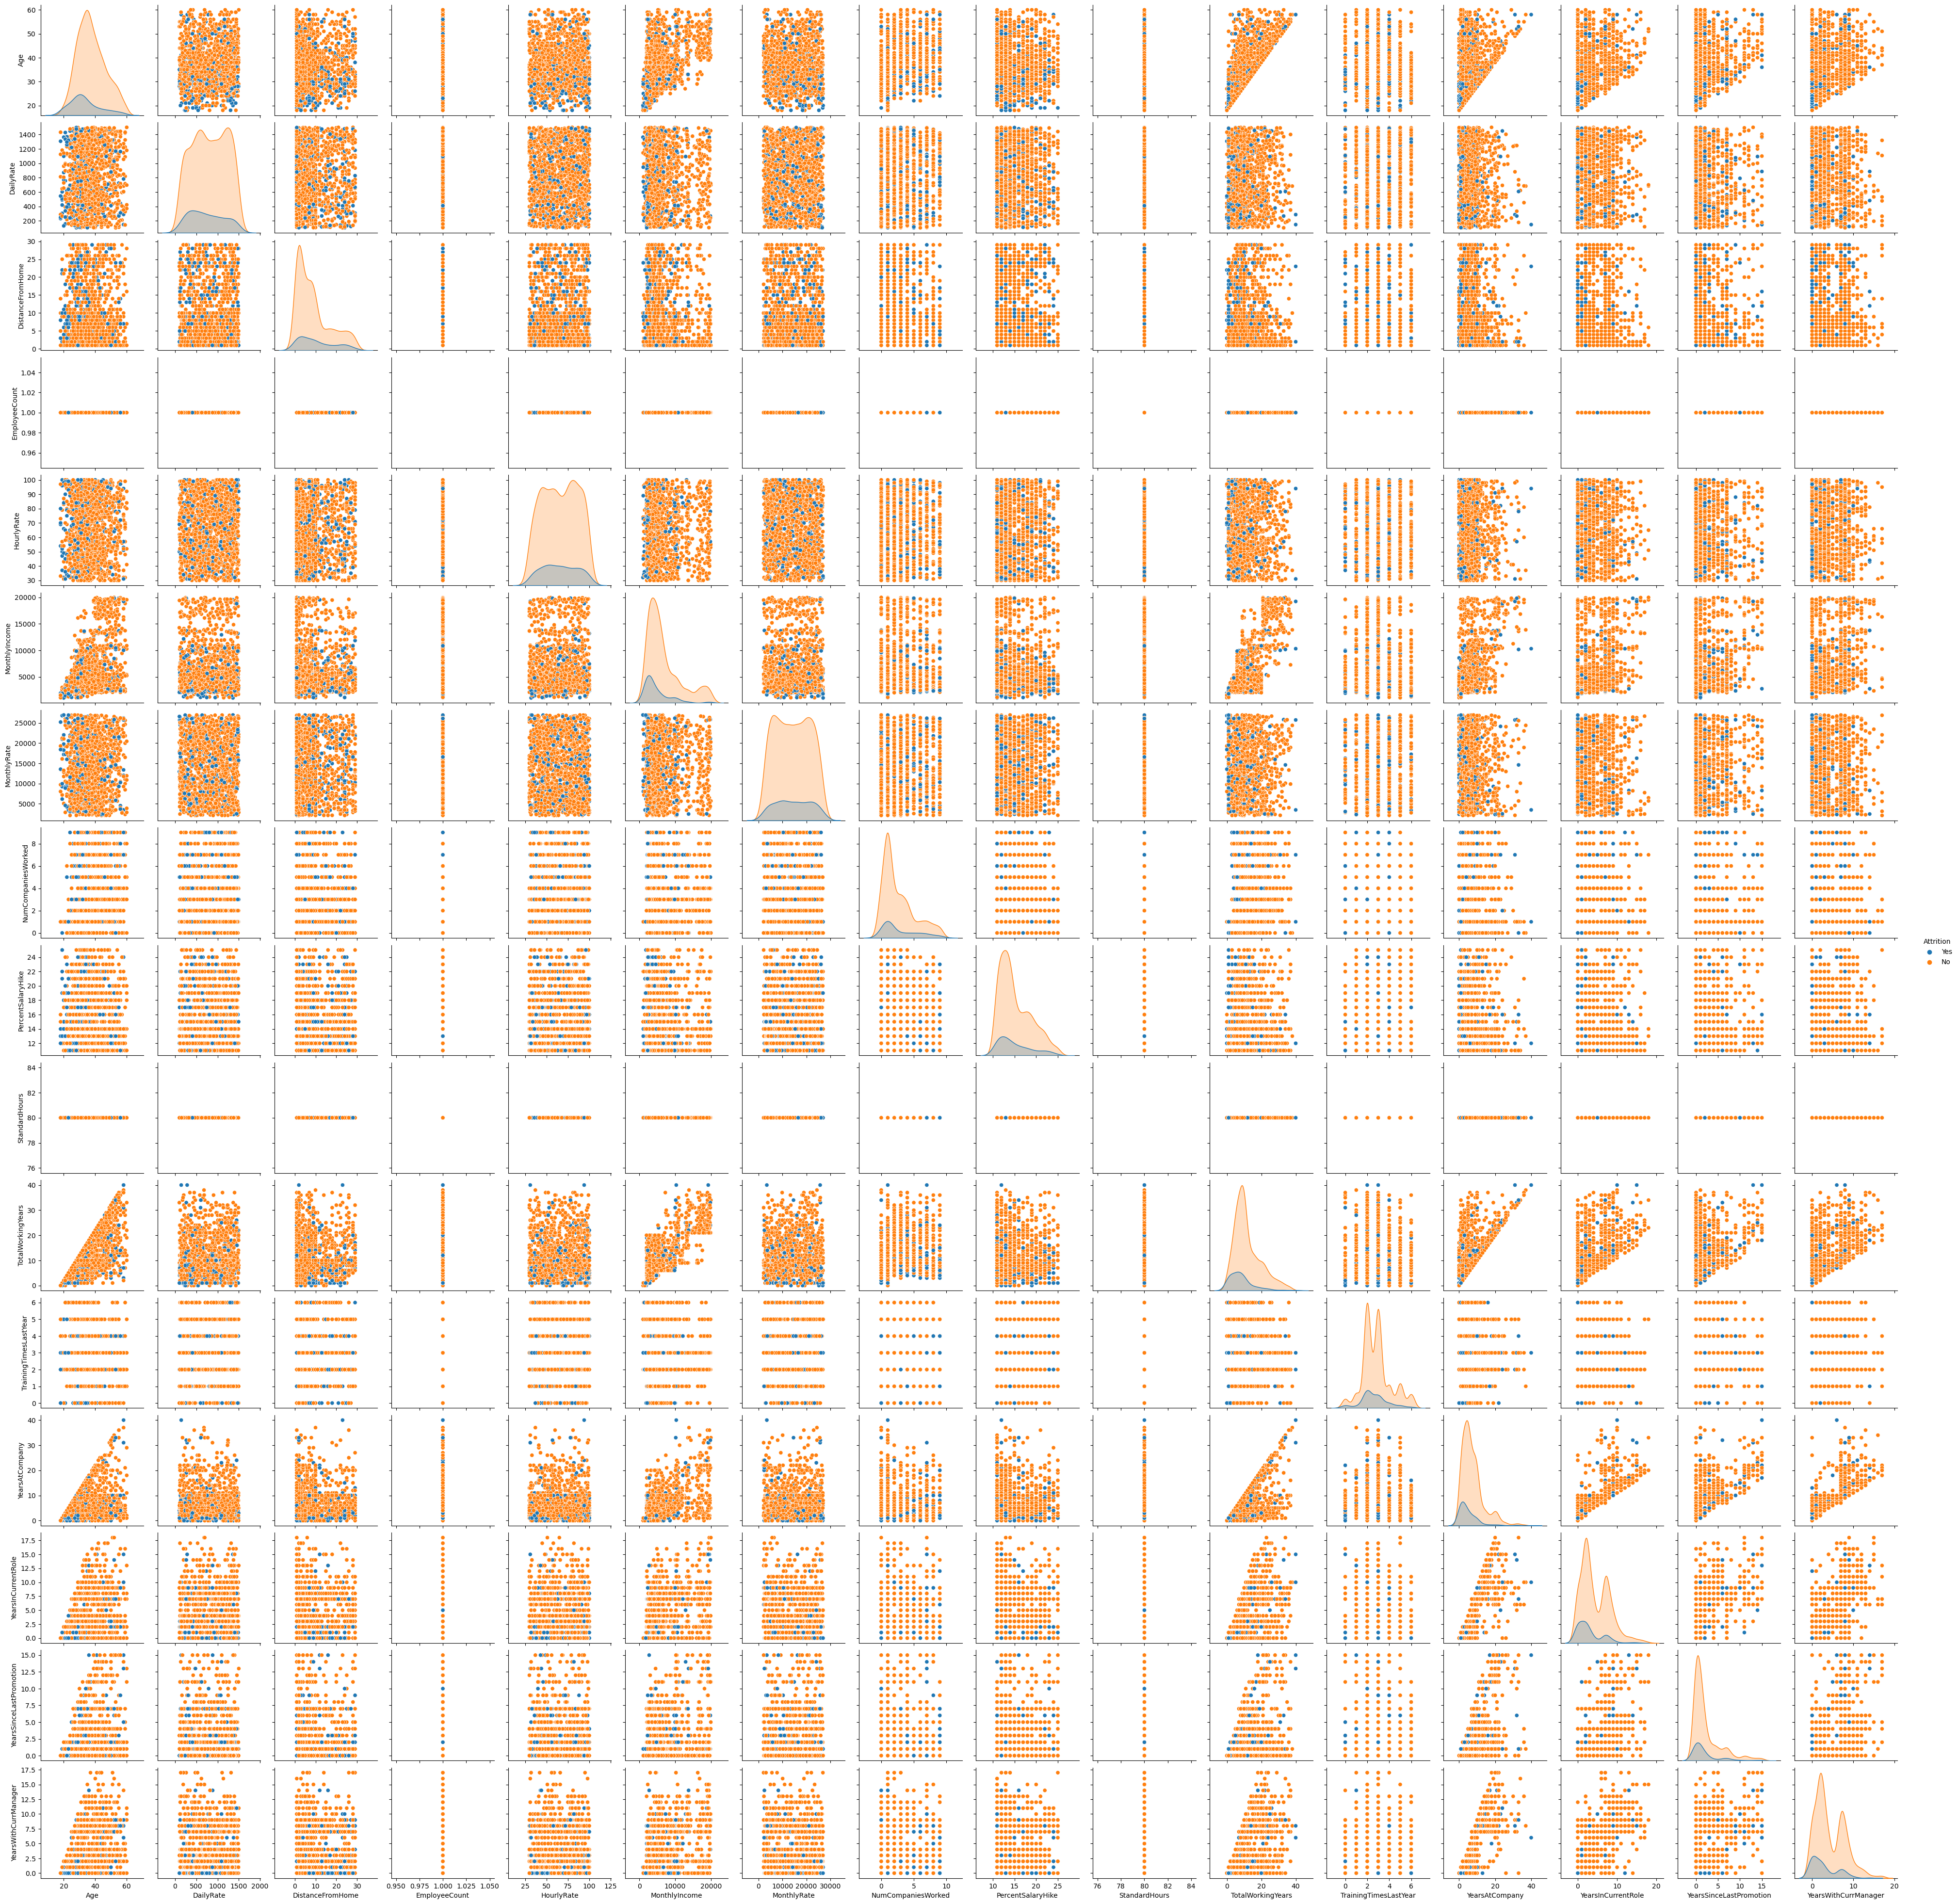

In [75]:
sns.pairplot(df[numerical_columns+["Attrition"]], hue = "Attrition", diag_kind = 'kde')
plt.show()